In [1]:
import astropy.io.fits as fits
import pandas as pd
import matplotlib.pylab as plt
import urllib
import io
import numpy as np
from contextlib import closing


In [2]:
import boilerplate

In [3]:
example_data = pd.read_csv("example/integral_isgri_.area", names=["energy", "effarea"], delim_whitespace=True)

In [27]:
def get_isgri_matrix(n=43):    
    return fits.open(
        io.BytesIO(
            urllib.request.urlopen(
                f"ftp://isdcarc.unige.ch/arc/rev_3/ic/ibis/rsp/isgr_rmf_rsp_{n:04d}.fits"
            ).read()
        )
    )

def get_isgri_ebds(n=43):    
    return fits.open(
        io.BytesIO(
            urllib.request.urlopen(
                f"ftp://isdcarc.unige.ch/arc/rev_3/ic/ibis/rsp/isgr_ebds_mod_0002.fits"
            ).read()
        )
    )

get_isgri_ebds()

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f7f48915e48>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f7f4895db00>]

In [32]:
def get_isgri_rmf10(n=25):    
    return fits.open(
        io.BytesIO(
            urllib.request.urlopen(
                f"ftp://isdcarc.unige.ch/arc/rev_3/ic/ibis/rsp/isgr_rmf_grp_{n:04d}.fits"
            ).read()
        )
    )

assert np.max(
    np.abs(
        get_isgri_rmf10()[2].data['MATRIX'].sum(1)-1 # matrix is normalized so that
    )
)<0.0001

(10, 700)

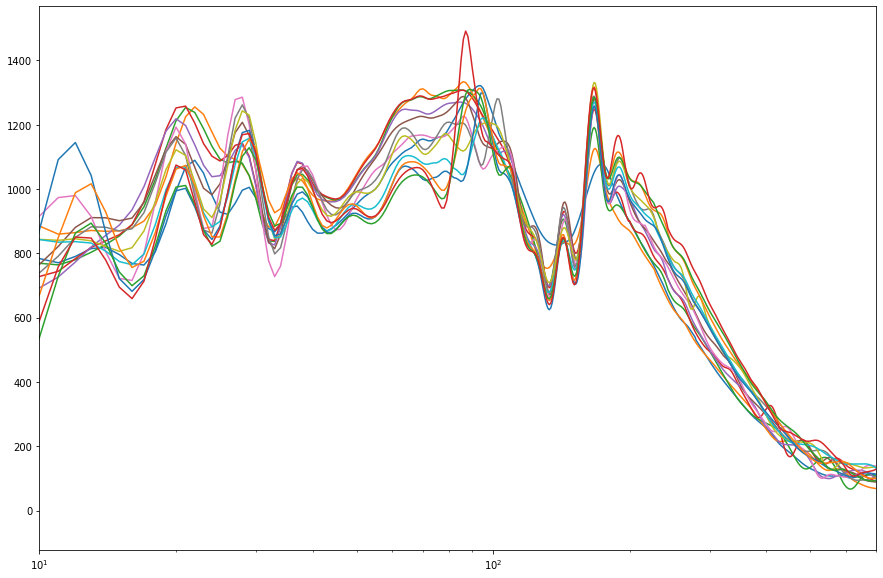

In [44]:
def get_isgri_arf10(n=43, debug=False):    
    u = f"ftp://isdcarc.unige.ch/arc/rev_3/ic/ibis/rsp/isgr_arf_rsp_{n:04d}.fits"
    if debug: print(u)
    return fits.open(
        io.BytesIO(
            urllib.request.urlopen(
                u
            ).read()
        )
    )

plt.figure(figsize=(15,10))
for n in range(30, 44):
    try:
        a = get_isgri_arf10(n)
        plt.plot(a[1].data['SPECRESP'])
    except Exception as e:
        print(e)
    
    
plt.semilogx()
plt.xlim([10, 700])

In [51]:
m = get_isgri_matrix()
effarea = np.stack(m[1].data['MATRIX']).sum(1)
acceptance = np.stack(m[1].data['MATRIX']).sum(0)
energy = (m[1].data['ENERG_LO'] + m[1].data['ENERG_HI'])*0.5

eb = get_isgri_ebds()
pha_energy = (eb[1].data['E_MIN'] + eb[1].data['E_MAX'])*0.5
d_pha_energy  = (eb[1].data['E_MAX'] - eb[1].data['E_MIN'])*0.5

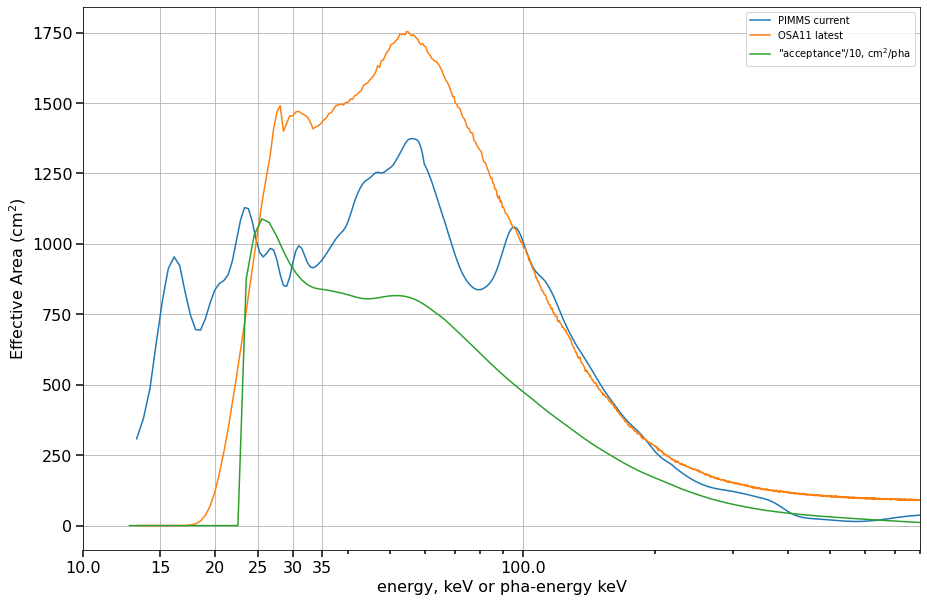

In [55]:
plt.figure(figsize=(15, 10))

plt.plot(
        example_data.energy,
        example_data.effarea,
        label="PIMMS current",
    )

plt.plot(
        energy,
        effarea,
        label="OSA11 latest",
    )

plt.plot(
        pha_energy,
        acceptance/d_pha_energy/10,
        label="\"acceptance\"/10, cm$^2$/pha"
    )

boilerplate.axes_legend_label(
    [plt.gca()],
    xlabel="energy, keV or pha-energy keV",
    ylabel="Effective Area (cm$^2$)"
)


plt.semilogx()

boilerplate.extra_ticks([15, 20, 25, 30, 35])
plt.xlim([10,800])
plt.grid()
plt.legend()

plt.savefig("areas.png")

In [7]:
pd.DataFrame(dict(
    energy=energy,
    effarea=effarea,
)).to_csv(
    "integral_isgri_.area-isgr_rsp_0043",
    sep=' ',
    index=False,
    header=False,
)

!paste integral_isgri_.area-isgr_rsp_0043 example/integral_isgri_.area

13.239349 0.0	  13.2393494  308.171906
13.71805 0.0	  13.71805  380.088837
14.196751 0.0	  14.1967506  486.377441
14.675449 0.0	  14.6754494  649.18634
15.15415 0.0	  15.15415  799.271912
15.632851 0.0015415628	  15.6328506  912.952454
16.11155 0.011217618	  16.1115494  953.888794
16.59025 0.10592926	  16.59025  922.80426
17.06895 0.5303842	  17.0689507  828.39447
17.54765 1.866607	  17.5476494  747.809082
18.02635 6.2602997	  18.02635  695.641602
18.50505 16.113718	  18.5050507  694.189819
18.98375 36.755234	  18.9837494  735.166321
19.46245 70.329056	  19.46245  791.40094
19.94115 118.43864	  19.9411507  836.642212
20.41985 184.88013	  20.4198494  859.489807
20.89855 260.68283	  20.89855  869.562195
21.37725 342.79962	  21.3772507  890.573364
21.85595 435.93927	  21.8559494  939.561218
22.33465 529.06946	  22.33465  1012.18408
22.81335 622.9546	  22.8133507  1085.17322
23.29205 717.31055	  23.2920494  1128.80823
23.77075 816.417	  23.77075  1125.16675
24.24945 908.22314	  24.2494507 